<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/GRU_RNN_model_(Multi_step)_for_short_term_power_forecasting_Tested_with_new_CEB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataframe**

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset


**Train an validation data set**

In [2]:
df = pd.read_csv(url9)
df=pd.DataFrame(df)
df

,Date & Time,Average Wind Speed (m/s),Average Wind Dirction (deg),Average Active Power (MW),Forecasted Power (kW)
0,8/1/2021 0:00,10.66,186.92,95.84,100.25
1,8/1/2021 0:10,10.71,188.15,96.03,100.01
2,8/1/2021 0:20,10.53,188.78,93.72,97.12
3,8/1/2021 0:30,10.20,189.80,88.84,96.96
4,8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...,...
4404,8/31/2021 23:20,11.62,195.08,100.45,101.74
4405,8/31/2021 23:30,11.16,196.36,98.01,101.78
4406,8/31/2021 23:40,10.66,198.02,93.11,101.85
4407,8/31/2021 23:50,10.90,196.96,93.68,101.29


**Rename column names**

In [3]:
col_1=(df.columns)[0]
col_2=(df.columns)[3]
feature = 'Active Power'
df.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
df


,Date & Time,Average Wind Speed (m/s),Average Wind Dirction (deg),Active Power,Forecasted Power (kW)
0,8/1/2021 0:00,10.66,186.92,95.84,100.25
1,8/1/2021 0:10,10.71,188.15,96.03,100.01
2,8/1/2021 0:20,10.53,188.78,93.72,97.12
3,8/1/2021 0:30,10.20,189.80,88.84,96.96
4,8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...,...
4404,8/31/2021 23:20,11.62,195.08,100.45,101.74
4405,8/31/2021 23:30,11.16,196.36,98.01,101.78
4406,8/31/2021 23:40,10.66,198.02,93.11,101.85
4407,8/31/2021 23:50,10.90,196.96,93.68,101.29


**Set Data & Time as index**

In [4]:
df=df.set_index('Date & Time')
df

,Average Wind Speed (m/s),Average Wind Dirction (deg),Active Power,Forecasted Power (kW)
Date & Time,,,,
8/1/2021 0:00,10.66,186.92,95.84,100.25
8/1/2021 0:10,10.71,188.15,96.03,100.01
8/1/2021 0:20,10.53,188.78,93.72,97.12
8/1/2021 0:30,10.20,189.80,88.84,96.96
8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...
8/31/2021 23:20,11.62,195.08,100.45,101.74
8/31/2021 23:30,11.16,196.36,98.01,101.78
8/31/2021 23:40,10.66,198.02,93.11,101.85


**Divide train and validation sets**

In [5]:
L=len(df)
valid_start=int(18*L/20)
train,valid=df[:valid_start],df[valid_start:]

print(train.shape)
print(valid.shape)


print(train.describe())
print(valid.describe())


(3968, 4)
(441, 4)
       Average  Wind Speed (m/s)   Average  Wind Dirction (deg)   \
count                   3,968.00                        3,968.00   
mean                        9.88                          196.16   
std                         2.65                           13.74   
min                         1.81                          130.84   
25%                         8.07                          188.48   
50%                        10.00                          194.03   
75%                        11.88                          202.26   
max                        15.88                          311.14   

       Active Power   Forecasted Power (kW)   
count      3,968.00                 3,968.00  
mean          71.39                    70.69  
std           31.76                    29.82  
min           -0.76                     1.83  
25%           45.82                    43.72  
50%           83.40                    76.94  
75%          100.97                   1

# **Data preparation**

In [6]:
T = 12
HORIZON = 6

In [7]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature])
train[feature] = scaler.fit_transform(train)

train_shifted = train.copy()



In [8]:
for i in range(1,HORIZON+1):
  train_shifted['y_t+'+str(i)] = train_shifted[feature].shift(-i)
train_shifted.head(10)

,Active Power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6
Date & Time,,,,,,,
8/1/2021 0:00,0.93,0.93,0.91,0.86,0.88,0.90,0.91
8/1/2021 0:10,0.93,0.91,0.86,0.88,0.90,0.91,0.94
8/1/2021 0:20,0.91,0.86,0.88,0.90,0.91,0.94,0.94
8/1/2021 0:30,0.86,0.88,0.90,0.91,0.94,0.94,0.92
8/1/2021 0:40,0.88,0.90,0.91,0.94,0.94,0.92,0.93
8/1/2021 0:50,0.90,0.91,0.94,0.94,0.92,0.93,0.94
8/1/2021 1:00,0.91,0.94,0.94,0.92,0.93,0.94,0.95
8/1/2021 1:10,0.94,0.94,0.92,0.93,0.94,0.95,0.97
8/1/2021 1:20,0.94,0.92,0.93,0.94,0.95,0.97,0.97


**Creating input data to model (Getting T lagged vaules)**

In [9]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature].shift(T-t)
train_shifted = train_shifted.rename(columns={feature:'Original_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(10)

,Original_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,active_power_t-11,active_power_t-10,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,
8/1/2021 1:50,0.94,0.95,0.97,0.97,0.97,0.93,0.90,0.93,0.93,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94
8/1/2021 2:00,0.95,0.97,0.97,0.97,0.93,0.90,0.89,0.93,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95
8/1/2021 2:10,0.97,0.97,0.97,0.93,0.90,0.89,0.87,0.91,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97
8/1/2021 2:20,0.97,0.97,0.93,0.90,0.89,0.87,0.85,0.86,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97
8/1/2021 2:30,0.97,0.93,0.90,0.89,0.87,0.85,0.82,0.88,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97
8/1/2021 2:40,0.93,0.90,0.89,0.87,0.85,0.82,0.79,0.90,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93
8/1/2021 2:50,0.90,0.89,0.87,0.85,0.82,0.79,0.73,0.91,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93,0.90
8/1/2021 3:00,0.89,0.87,0.85,0.82,0.79,0.73,0.70,0.94,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93,0.90,0.89
8/1/2021 3:10,0.87,0.85,0.82,0.79,0.73,0.70,0.71,0.94,0.92,0.93,0.94,0.95,0.97,0.97,0.97,0.93,0.90,0.89,0.87


**Train input and target arrays**

In [10]:
y_train = np.array(train_shifted[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [11]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [12]:
print(y_train.shape)
print(X_train.shape)

(3951, 6)
(3951, 12, 1)


**Data preparation - Validation data**

In [13]:
valid=pd.DataFrame(valid[feature])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature])
valid_new.head(20)

,Active Power
Date & Time,
8/28/2021 20:50,102.68
8/28/2021 21:00,102.85
8/28/2021 21:10,102.70
8/28/2021 21:20,102.82
8/28/2021 21:30,102.84
8/28/2021 21:40,102.99
8/28/2021 21:50,102.77
8/28/2021 22:00,102.55
8/28/2021 22:10,102.22


In [14]:
valid_new[feature]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
for i in range(1,HORIZON+1):
  valid_shifted['y_t+'+str(i)] = valid_shifted[feature].shift(-i)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature:'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted[["y_t+"+str(i) for i in range(1,HORIZON+1)]])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [15]:
print(y_valid.shape)
print(X_valid.shape)

(435, 6)
(435, 12, 1)


# **Implement the GRU-RNN**

In [16]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [17]:
UNITS = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples

In [18]:
model = Sequential()
model.add(GRU(UNITS, input_shape=(T, 1)))
model.add(Dense(HORIZON))

In [19]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 6)                 36        
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [20]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [21]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/10
124/124 [==============================] - 7s 18ms/step - loss: 0.3039 - val_loss: 0.1049
Epoch 2/10
124/124 [==============================] - 1s 10ms/step - loss: 0.0475 - val_loss: 0.0173
Epoch 3/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0138 - val_loss: 0.0095
Epoch 4/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0081 - val_loss: 0.0090
Epoch 5/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0074 - val_loss: 0.0088
Epoch 6/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0071 - val_loss: 0.0086
Epoch 7/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0085
Epoch 8/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0068 - val_loss: 0.0084
Epoch 9/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0067 - val_loss: 0.0087
Epoch 10/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0066 - val_loss: 0.00

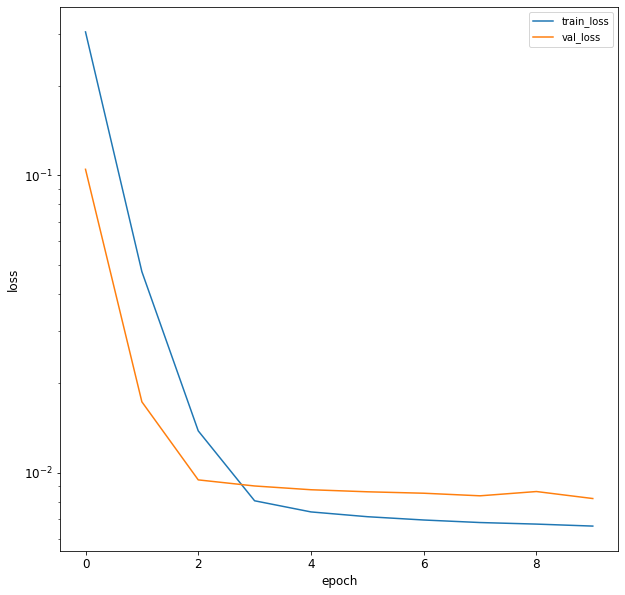

In [22]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model**

**Load test data set**

In [23]:
df_test = pd.read_csv(url11)
df_test=pd.DataFrame(df_test)

In [24]:
df_test=df_test.drop(0)
df_test=df_test.head(200)

In [25]:
df_test

,Time Stamp,Actual Total WTG Output Power /kW,Forecasted Power,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
1,9/1/2021 0:00,"93,793.50",101374.27,101448.41,101522.62,101591.15,101665.59,101745.10,101813.17,101894.29,101978.16,102068.10,102147.59,102213.88,102287.53,102362.74,102429.82,102498.55,102559.89,102636.38
2,9/1/2021 0:10,"95,265.20",96333.19,96618.75,96877.09,97105.13,97338.96,97563.53,97801.93,98062.14,98298.47,98573.58,98848.35,99128.12,99384.23,99610.68,99849.61,100096.77,100316.69,100551.60
3,9/1/2021 0:20,"96,545.60",96618.75,96877.09,97105.13,97338.96,97563.53,97801.93,98062.14,98298.47,98573.58,98848.35,99128.12,99384.23,99610.68,99849.61,100096.77,100316.69,100551.60,100766.17
4,9/1/2021 0:30,"97,879.00",96877.09,97105.13,97338.96,97563.53,97801.93,98062.14,98298.47,98573.58,98848.35,99128.12,99384.23,99610.68,99849.61,100096.77,100316.69,100551.60,100766.17,101010.05
5,9/1/2021 0:40,"97,867.20",96427.69,96671.78,96915.66,97139.10,97393.34,97666.38,97901.95,98182.95,98474.13,98788.09,99062.91,99292.58,99550.75,99815.60,100053.13,100297.77,100505.69,100765.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,9/2/2021 8:30,"41,440.70",18035.04,16916.61,15843.90,14779.51,13712.52,12629.17,11562.97,12273.08,12985.91,13691.19,14427.08,15176.34,15929.10,16122.25,16316.64,16516.79,16710.66,16910.23
197,9/2/2021 8:40,"40,848.70",16916.61,15843.90,14779.51,13712.52,12629.17,11562.97,12273.08,12985.91,13691.19,14427.08,15176.34,15929.10,16122.25,16316.64,16516.79,16710.66,16910.23,17112.49
198,9/2/2021 8:50,"40,248.40",15843.90,14779.51,13712.52,12629.17,11562.97,12273.08,12985.91,13691.19,14427.08,15176.34,15929.10,16122.25,16316.64,16516.79,16710.66,16910.23,17112.49,17250.64
199,9/2/2021 9:00,"39,853.00",14779.51,13712.52,12629.17,11562.97,12273.08,12985.91,13691.19,14427.08,15176.34,15929.10,16122.25,16316.64,16516.79,16710.66,16910.23,17112.49,17250.64,17381.85


In [26]:
col_1=(df_test.columns)[0]
col_2=(df_test.columns)[1]
feature = 'Active Power'
df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)

In [27]:
for i in range(HORIZON):
  col=(df_test.columns)[i+2]
  df_test.rename(columns={col :'Forecasted power t+'+str(i+1)},inplace=True)

In [28]:
df_test=df_test.set_index('Date & Time')
df_test = df_test.apply(pd.to_numeric)
df_test=df_test.div(1000)

In [29]:
df_test.head(20)

,Active Power,Forecasted power t+1,Forecasted power t+2,Forecasted power t+3,Forecasted power t+4,Forecasted power t+5,Forecasted power t+6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Date & Time,,,,,,,,,,,,,,,,,,,
9/1/2021 0:00,93.79,101.37,101.45,101.52,101.59,101.67,101.75,101.81,101.89,101.98,102.07,102.15,102.21,102.29,102.36,102.43,102.50,102.56,102.64
9/1/2021 0:10,95.27,96.33,96.62,96.88,97.11,97.34,97.56,97.80,98.06,98.30,98.57,98.85,99.13,99.38,99.61,99.85,100.10,100.32,100.55
9/1/2021 0:20,96.55,96.62,96.88,97.11,97.34,97.56,97.80,98.06,98.30,98.57,98.85,99.13,99.38,99.61,99.85,100.10,100.32,100.55,100.77
9/1/2021 0:30,97.88,96.88,97.11,97.34,97.56,97.80,98.06,98.30,98.57,98.85,99.13,99.38,99.61,99.85,100.10,100.32,100.55,100.77,101.01
9/1/2021 0:40,97.87,96.43,96.67,96.92,97.14,97.39,97.67,97.90,98.18,98.47,98.79,99.06,99.29,99.55,99.82,100.05,100.30,100.51,100.77
9/1/2021 0:50,97.92,96.80,97.04,97.26,97.50,97.77,98.00,98.27,98.56,98.86,99.13,99.36,99.61,99.87,100.10,100.34,100.55,100.80,101.05
9/1/2021 1:00,98.02,97.68,97.89,98.08,98.29,98.52,98.72,98.96,99.21,99.48,99.71,99.91,100.13,100.35,100.55,100.76,100.94,101.14,101.36
9/1/2021 1:10,98.12,99.21,99.37,99.51,99.65,99.78,99.93,100.08,100.22,100.38,100.55,100.73,100.89,101.03,101.18,101.33,101.45,101.58,101.68
9/1/2021 1:20,98.13,99.37,99.51,99.65,99.78,99.93,100.08,100.22,100.38,100.55,100.73,100.89,101.03,101.18,101.33,101.45,101.58,101.68,101.81


In [30]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test[feature])
test[feature] = scaler.fit_transform(test)
test


,Active Power
Date & Time,
9/1/2021 0:00,0.91
9/1/2021 0:10,0.93
9/1/2021 0:20,0.94
9/1/2021 0:30,0.96
9/1/2021 0:40,0.96
...,...
9/2/2021 8:30,0.33
9/2/2021 8:40,0.32
9/2/2021 8:50,0.32


In [31]:
test_shifted = test.copy()
for i in range(1,HORIZON+1):
  test_shifted['y_t+'+str(i)] = test_shifted[feature].shift(-i)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature].shift(T-t)
test_shifted = test_shifted.rename(columns={feature:'Original_active_power'})

X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

for i in range(1,HORIZON+1):
  forecasted_values=np.array(df_test['Forecasted power t+'+str(i)])
  test_shifted['Forecasted power t+'+str(i)] = forecasted_values
test_shifted

,Original_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,active_power_t-11,active_power_t-10,active_power_t-9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,Forecasted power t+1,Forecasted power t+2,Forecasted power t+3,Forecasted power t+4,Forecasted power t+5,Forecasted power t+6
Date & Time,,,,,,,,,,,,,,,,,,,,,
9/1/2021 0:00,0.91,0.93,0.94,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,NaN,NaN,0.91,101.37,101.45,101.52,101.59,101.67,101.75
9/1/2021 0:10,0.93,0.94,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,NaN,0.91,0.93,96.33,96.62,96.88,97.11,97.34,97.56
9/1/2021 0:20,0.94,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,0.91,0.93,0.94,96.62,96.88,97.11,97.34,97.56,97.80
9/1/2021 0:30,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.91,0.93,0.94,0.96,96.88,97.11,97.34,97.56,97.80,98.06
9/1/2021 0:40,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.93,0.94,0.96,0.96,96.43,96.67,96.92,97.14,97.39,97.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/2/2021 8:30,0.33,0.32,0.32,0.31,0.29,NaN,NaN,0.44,0.42,0.49,...,0.39,0.34,0.32,0.33,18.04,16.92,15.84,14.78,13.71,12.63
9/2/2021 8:40,0.32,0.32,0.31,0.29,NaN,NaN,NaN,0.42,0.49,0.53,...,0.34,0.32,0.33,0.32,16.92,15.84,14.78,13.71,12.63,11.56
9/2/2021 8:50,0.32,0.31,0.29,NaN,NaN,NaN,NaN,0.49,0.53,0.48,...,0.32,0.33,0.32,0.32,15.84,14.78,13.71,12.63,11.56,12.27


In [32]:
test_shifted.head(20)

,Original_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,active_power_t-11,active_power_t-10,active_power_t-9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,Forecasted power t+1,Forecasted power t+2,Forecasted power t+3,Forecasted power t+4,Forecasted power t+5,Forecasted power t+6
Date & Time,,,,,,,,,,,,,,,,,,,,,
9/1/2021 0:00,0.91,0.93,0.94,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,NaN,NaN,0.91,101.37,101.45,101.52,101.59,101.67,101.75
9/1/2021 0:10,0.93,0.94,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,NaN,0.91,0.93,96.33,96.62,96.88,97.11,97.34,97.56
9/1/2021 0:20,0.94,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,NaN,0.91,0.93,0.94,96.62,96.88,97.11,97.34,97.56,97.80
9/1/2021 0:30,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.91,0.93,0.94,0.96,96.88,97.11,97.34,97.56,97.80,98.06
9/1/2021 0:40,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.93,0.94,0.96,0.96,96.43,96.67,96.92,97.14,97.39,97.67
9/1/2021 0:50,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.94,0.96,0.96,0.96,96.80,97.04,97.26,97.50,97.77,98.00
9/1/2021 1:00,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.96,0.96,0.96,0.96,97.68,97.89,98.08,98.29,98.52,98.72
9/1/2021 1:10,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.96,0.96,0.96,0.96,99.21,99.37,99.51,99.65,99.78,99.93
9/1/2021 1:20,0.96,0.96,0.96,0.96,0.96,0.96,0.96,NaN,NaN,NaN,...,0.96,0.96,0.96,0.96,99.37,99.51,99.65,99.78,99.93,100.08


In [33]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
#y_test = np.array(test_shifted['Original_active_power'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)
X_test

array([[[0.91],
        [0.93],
        [0.94],
        ...,
        [0.96],
        [0.96],
        [0.96]],

       [[0.93],
        [0.94],
        [0.96],
        ...,
        [0.96],
        [0.96],
        [0.96]],

       [[0.94],
        [0.96],
        [0.96],
        ...,
        [0.96],
        [0.96],
        [0.96]],

       ...,

       [[0.59],
        [0.53],
        [0.49],
        ...,
        [0.43],
        [0.41],
        [0.41]],

       [[0.53],
        [0.49],
        [0.47],
        ...,
        [0.41],
        [0.41],
        [0.39]],

       [[0.49],
        [0.47],
        [0.44],
        ...,
        [0.41],
        [0.39],
        [0.34]]])

In [34]:
test_shifted

,Original_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,active_power_t-11,active_power_t-10,active_power_t-9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,Forecasted power t+1,Forecasted power t+2,Forecasted power t+3,Forecasted power t+4,Forecasted power t+5,Forecasted power t+6
Date & Time,,,,,,,,,,,,,,,,,,,,,
9/1/2021 1:50,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.91,0.93,0.94,...,0.96,0.96,0.96,0.96,99.42,99.57,99.71,99.84,99.97,100.11
9/1/2021 2:00,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.93,0.94,0.96,...,0.96,0.96,0.96,0.96,99.57,99.71,99.84,99.97,100.11,100.26
9/1/2021 2:10,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.94,0.96,0.96,...,0.96,0.96,0.96,0.96,99.71,99.83,99.96,100.08,100.22,100.36
9/1/2021 2:20,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.96,0.96,0.96,0.96,99.83,99.96,100.08,100.22,100.36,100.49
9/1/2021 2:30,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.96,0.96,0.96,0.96,99.96,100.08,100.22,100.36,100.49,100.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/2/2021 7:30,0.43,0.41,0.41,0.39,0.34,0.32,0.33,0.76,0.67,0.59,...,0.49,0.53,0.48,0.43,24.80,23.59,22.46,21.34,20.24,19.14
9/2/2021 7:40,0.41,0.41,0.39,0.34,0.32,0.33,0.32,0.67,0.59,0.53,...,0.53,0.48,0.43,0.41,23.59,22.46,21.34,20.24,19.14,18.04
9/2/2021 7:50,0.41,0.39,0.34,0.32,0.33,0.32,0.32,0.59,0.53,0.49,...,0.48,0.43,0.41,0.41,22.46,21.34,20.24,19.14,18.04,16.92


In [35]:
print(y_test.shape)
print(X_test.shape)

(183, 6)
(183, 12, 1)


In [36]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
predictions

,0,1,2,3,4,5
0,0.96,0.95,0.95,0.94,0.94,0.94
1,0.95,0.95,0.95,0.94,0.94,0.94
2,0.95,0.95,0.95,0.94,0.94,0.94
3,0.95,0.95,0.95,0.94,0.94,0.94
4,0.95,0.95,0.95,0.94,0.94,0.94
...,...,...,...,...,...,...
178,0.45,0.43,0.47,0.43,0.48,0.47
179,0.42,0.41,0.43,0.41,0.44,0.43
180,0.41,0.42,0.41,0.42,0.43,0.42
181,0.40,0.40,0.41,0.40,0.41,0.42


In [37]:
predictions[0]

0     0.96
1     0.95
2     0.95
3     0.95
4     0.95
      ... 
178   0.45
179   0.42
180   0.41
181   0.40
182   0.36
Name: 0, Length: 183, dtype: float32

In [38]:
x = pd.DataFrame()
x['Date & Time'] = test_shifted.index
x['Original output power']= np.array(test_shifted['Original_active_power'])
x['Original output power']=scaler.inverse_transform(np.array(x[['Original output power']]))
for i in range(1,HORIZON+1):
  x['predictions t+'+str(i)]=predictions[i-1]
  x[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(x[['predictions t+'+str(i)]]))
  x['actual t+'+str(i)]=pd.DataFrame(y_test)[i-1]
  x[['actual t+'+str(i)]]=scaler.inverse_transform(np.array(x[['actual t+'+str(i)]]))
  x['forecasted t+'+str(i)]=np.array(test_shifted[['Forecasted power t+'+str(i)]])
x

,Date & Time,Original output power,predictions t+1,actual t+1,forecasted t+1,predictions t+2,actual t+2,forecasted t+2,predictions t+3,actual t+3,forecasted t+3,predictions t+4,actual t+4,forecasted t+4,predictions t+5,actual t+5,forecasted t+5,predictions t+6,actual t+6,forecasted t+6
0,9/1/2021 1:50,98.34,97.66,98.26,99.42,97.44,98.35,99.57,96.85,98.26,99.71,96.26,98.33,99.84,96.44,98.36,99.97,96.40,98.17,100.11
1,9/1/2021 2:00,98.26,97.61,98.35,99.57,97.36,98.26,99.71,96.81,98.33,99.84,96.18,98.36,99.97,96.40,98.17,100.11,96.35,98.15,100.26
2,9/1/2021 2:10,98.35,97.64,98.26,99.71,97.45,98.33,99.83,96.81,98.36,99.96,96.26,98.17,100.08,96.42,98.15,100.22,96.36,98.09,100.36
3,9/1/2021 2:20,98.26,97.61,98.33,99.83,97.37,98.36,99.96,96.80,98.17,100.08,96.19,98.15,100.22,96.39,98.09,100.36,96.36,98.25,100.49
4,9/1/2021 2:30,98.33,97.63,98.36,99.96,97.42,98.17,100.08,96.81,98.15,100.22,96.24,98.09,100.36,96.41,98.25,100.49,96.35,98.40,100.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,9/2/2021 7:30,50.56,52.69,48.77,24.80,50.31,48.90,23.59,54.40,47.23,22.46,50.51,42.07,21.34,54.84,40.83,20.24,54.48,41.44,19.14
179,9/2/2021 7:40,48.77,49.37,48.90,23.59,48.46,47.23,22.46,50.67,42.07,21.34,48.82,40.83,20.24,51.60,41.44,19.14,50.73,40.85,18.04
180,9/2/2021 7:50,48.90,48.77,47.23,22.46,49.54,42.07,21.34,49.16,40.83,20.24,49.54,41.44,19.14,50.27,40.85,18.04,49.70,40.25,16.92
181,9/2/2021 8:00,47.23,47.92,42.07,21.34,48.18,40.83,20.24,48.38,41.44,19.14,48.05,40.85,18.04,49.19,40.25,16.92,49.26,39.85,15.84


In [39]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

for i in range(1,HORIZON+1):
  actual = x['actual t+1']
  pred = x['predictions t+'+str(i)]
  forecast = x['forecasted t+'+str(i)]
  mape_value_our=mape(actual, pred)
  mape_value_forecast=mape(actual, forecast)
  print('GRU Model: MAPE for t+'+str(i)+'= '+str(mape_value_our))
  print('CEB Model: MAPE for t+'+str(i)+'= '+str(mape_value_forecast))


GRU Model: MAPE for t+1= 6.29431230221235
CEB Model: MAPE for t+1= 24.147568901628556
GRU Model: MAPE for t+2= 5.08878311325585
CEB Model: MAPE for t+2= 25.38779199893884
GRU Model: MAPE for t+3= 7.856692172642813
CEB Model: MAPE for t+3= 26.55778109181196
GRU Model: MAPE for t+4= 5.387425559627645
CEB Model: MAPE for t+4= 27.73137461332561
GRU Model: MAPE for t+5= 7.963603733584787
CEB Model: MAPE for t+5= 28.908498869487232
GRU Model: MAPE for t+6= 7.989986738729538
CEB Model: MAPE for t+6= 30.102612999047512


In [40]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

for i in range(1,HORIZON+1):
  actual = x['actual t+1']
  pred = x['predictions t+'+str(i)]
  forecast = x['forecasted t+'+str(i)]
  rmse_value_our=rmse(actual, pred)
  rmse_value_forecast=rmse(actual, forecast)
  print('GRU Model: RMSE for t+'+str(i)+'= '+str(rmse_value_our))
  print('CEB Model: RMSE for t+'+str(i)+'= '+str(rmse_value_forecast))


GRU Model: RMSE for t+1= 5.5015514240045515
CEB Model: RMSE for t+1= 15.630079870885465
GRU Model: RMSE for t+2= 4.488243906737489
CEB Model: RMSE for t+2= 16.16437169777096
GRU Model: RMSE for t+3= 6.3503206835516846
CEB Model: RMSE for t+3= 16.70468797214184
GRU Model: RMSE for t+4= 4.459648887328494
CEB Model: RMSE for t+4= 17.257372616763767
GRU Model: RMSE for t+5= 6.177509263468621
CEB Model: RMSE for t+5= 17.820964981404295
GRU Model: RMSE for t+6= 6.06287791891159
CEB Model: RMSE for t+6= 18.405929754707113


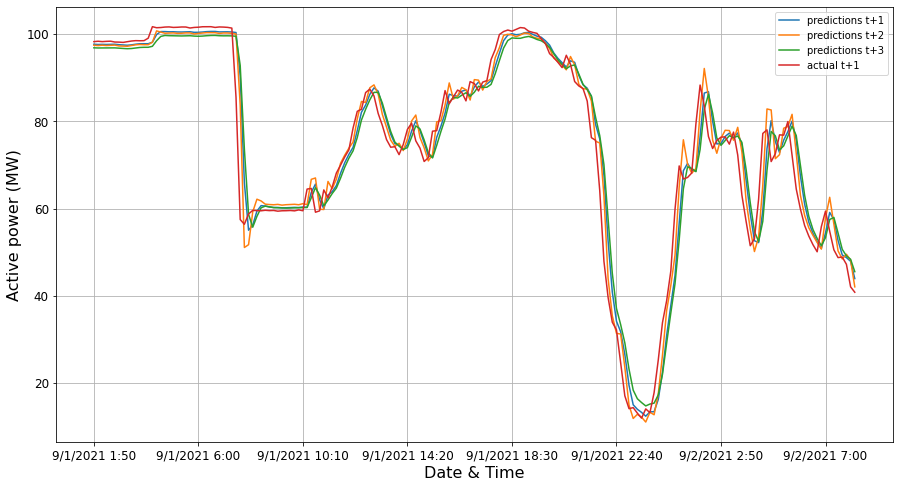

In [41]:
x.plot(x='Date & Time', y=['predictions t+1','predictions t+2','predictions t+3','actual t+1'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()

In [42]:
l=["predictions t+"+str(i) for i in range(1,HORIZON+1)]
l

['predictions t+1',
 'predictions t+2',
 'predictions t+3',
 'predictions t+4',
 'predictions t+5',
 'predictions t+6']

In [43]:
for i in range(1,HORIZON):
  fig1 = px.line(x,x='Date & Time', y=['predictions t+'+str(i) ,'actual t+'+str(i)],labels={ "value": 'Active power (MW)'},title="GRU model-multiatep:Expected vs predicted power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

In [44]:
for i in range(1,HORIZON):
  fig1 = px.line(x,x='Date & Time', y=['forecasted t+'+str(i) ,'actual t+'+str(i)],labels={ "value": 'Active power (MW)'},title="GRU model-multiatep:Expected vs forecasted(CEB) power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

In [45]:
for i in range(1,HORIZON):
  fig1 = px.line(x,x='Date & Time', y=['predictions t+'+str(i) ,'actual t+'+str(i),'forecasted t+'+str(i)],labels={ "value": 'Active power (MW)'},title="GRU model-multiatep:Comparison with CEB multistep power forecasting => t+"+str(i)) 
  fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
  fig1.show()

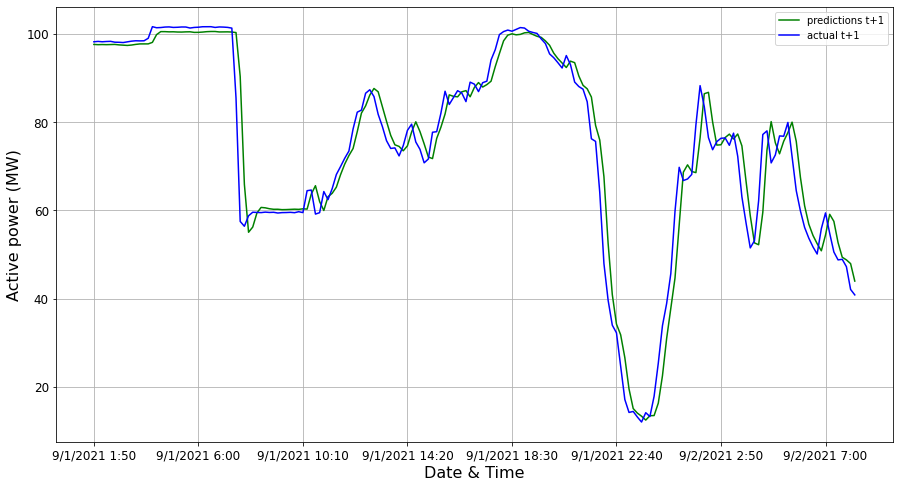

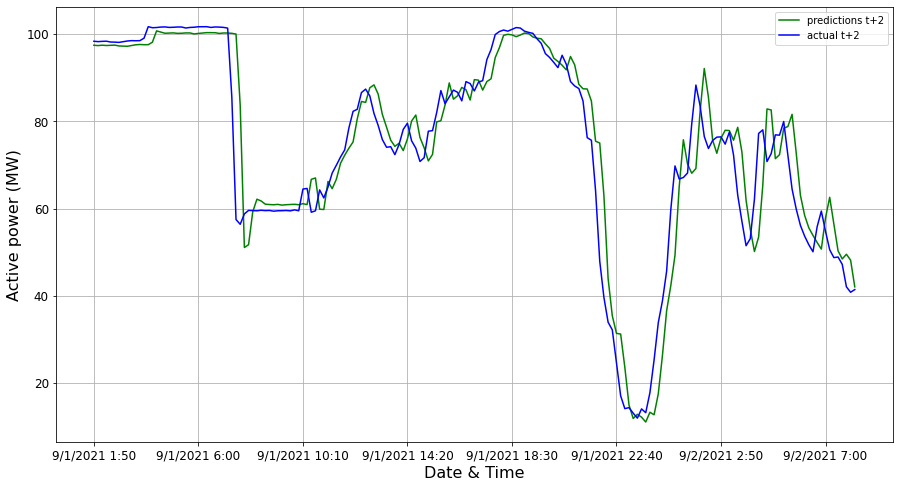

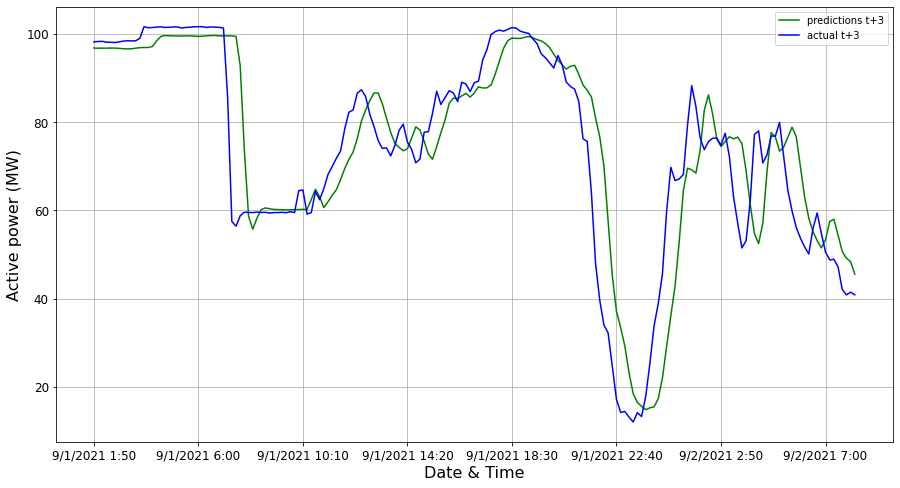

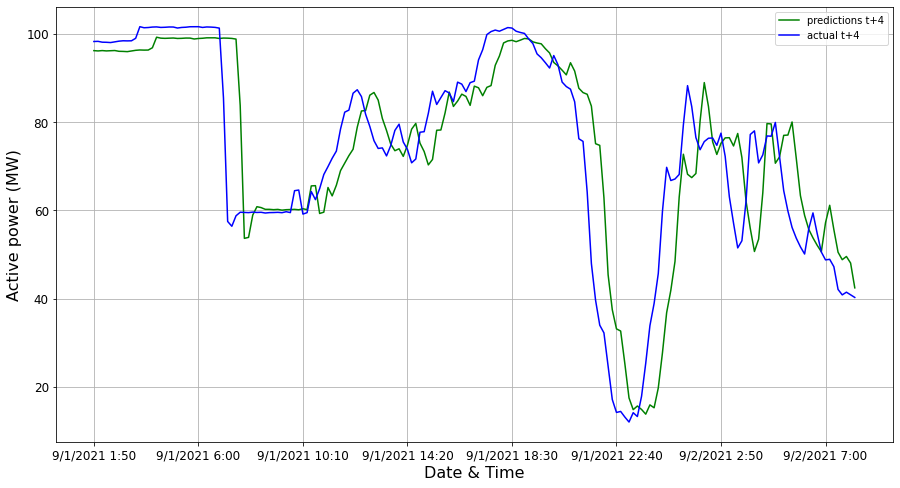

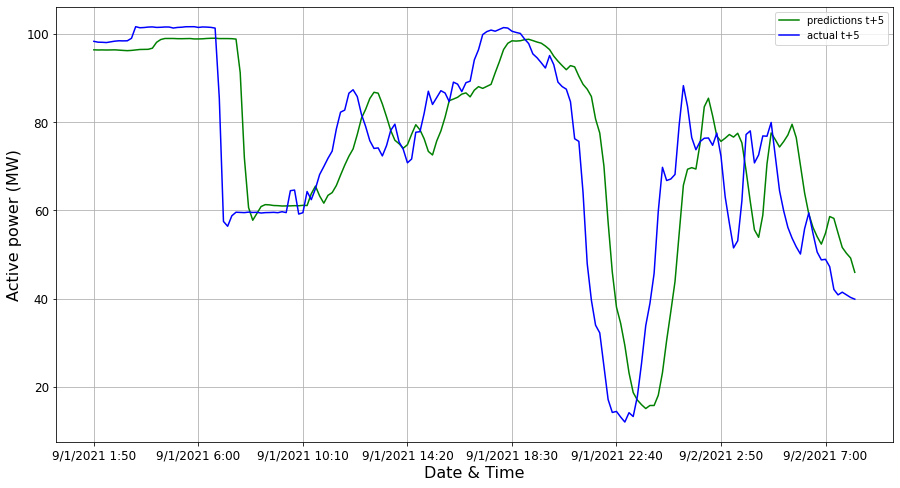

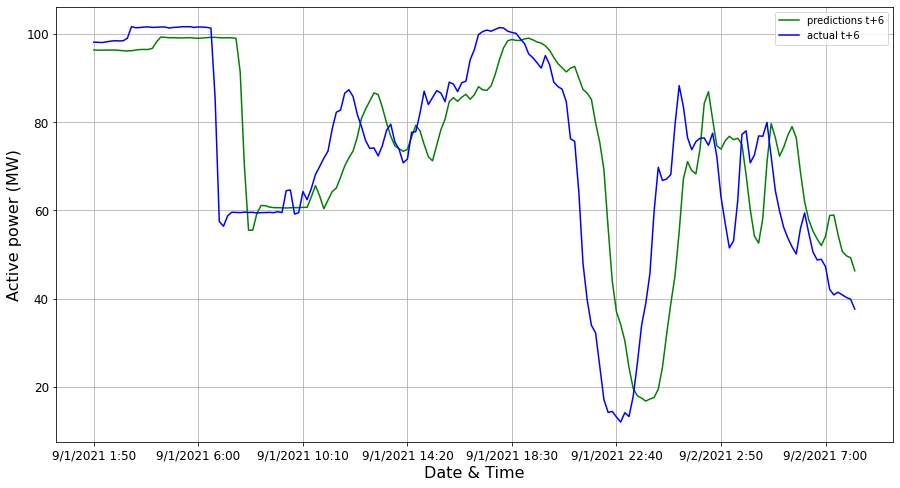

In [46]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['predictions t+'+str(i),'actual t+'+str(i)], style=['g','b'],fontsize=12, figsize=(15, 8))
  plt.xlabel('Date & Time', fontsize=16)
  plt.ylabel('Active power (MW)', fontsize=16)
  plt.grid()
  plt.show()

In [47]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['forecasted t+'+str(i), 'actual t+1'+str(i)], style=['r', 'b'],fontsize=12, figsize=(15, 8))
  plt.xlabel('Date & Time', fontsize=16)
  plt.ylabel('Active power (MW)', fontsize=16)
  plt.grid()
  plt.show()

KeyError: ignored